In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset from a CSV file
weather_data = pd.read_csv('/kaggle/input/etp-dataset/ETP_Dataset.csv')

# Preview the first few rows of the datase
weather_data.head()

,Date/heure,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],min_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],Somme_Precipitation[mm],moy_WindSpeed[m/s],max_WindSpeed[m/s],max_WindSpeedMax[m/s],moy_WindDirection[deg],dernier_WindDirection[deg],ETP quotidien [mm]
0,05/08/2022 00:00,24.73,35.08,15.11,12.4,8.8,361,1.90,0.30,51.87,83.30,22.00,0.0,0.5,2.1,4.4,263.5,263.5,2.8
1,04/08/2022 00:00,25.26,35.79,16.40,14.6,8.0,288,1.73,0.00,59.06,99.54,19.84,0.0,0.6,1.7,5.3,263.5,263.5,5.0
2,03/08/2022 00:00,28.37,36.71,19.80,12.3,7.4,285,2.56,0.95,38.43,65.76,23.60,0.0,0.7,2.6,5.3,263.5,263.5,5.3
3,02/08/2022 00:00,32.17,43.43,19.68,0.9,-4.7,296,4.55,1.70,16.44,38.56,5.23,0.0,0.6,2.3,6.6,263.5,263.5,5.3
4,01/08/2022 00:00,32.30,41.90,21.26,8.7,1.5,290,3.97,1.39,26.68,47.56,9.52,0.0,0.6,2.7,6.7,263.5,263.5,5.5


In [3]:
weather_data.columns

Index(['Date/heure', 'moy_Temp[°C]', 'max_Temp[°C]', 'min_Temp[°C]',
       'moy_DewPoint[°C]', 'min_DewPoint[°C]', 'moy_SolarRadiation[W/m2]',
       'moy_VPD[kPa]', 'min_VPD[kPa]', 'moy_RelativeHumidity[%]',
       'max_RelativeHumidity[%]', 'min_RelativeHumidity[%]',
       'Somme_Precipitation[mm]', 'moy_WindSpeed[m/s]', 'max_WindSpeed[m/s]',
       'max_WindSpeedMax[m/s]', 'moy_WindDirection[deg]',
       'dernier_WindDirection[deg]', 'ETP quotidien [mm]'],
      dtype='object')

In [4]:
# Check the shape of the dataset
print("Shape of dataset:", weather_data.shape)

Shape of dataset: (1781, 19)


In [5]:
# Check the data types of the columns
print("Data types of columns:\n", weather_data.dtypes)

Data types of columns:
 Date/heure                     object
moy_Temp[°C]                  float64
max_Temp[°C]                  float64
min_Temp[°C]                  float64
moy_DewPoint[°C]              float64
min_DewPoint[°C]              float64
moy_SolarRadiation[W/m2]        int64
moy_VPD[kPa]                  float64
min_VPD[kPa]                  float64
moy_RelativeHumidity[%]       float64
max_RelativeHumidity[%]       float64
min_RelativeHumidity[%]       float64
Somme_Precipitation[mm]       float64
moy_WindSpeed[m/s]            float64
max_WindSpeed[m/s]            float64
max_WindSpeedMax[m/s]         float64
moy_WindDirection[deg]        float64
dernier_WindDirection[deg]    float64
ETP quotidien [mm]            float64
dtype: object


In [6]:
# Check for missing values
print("Number of missing values:\n", weather_data.isnull().sum())

Number of missing values:
 Date/heure                    0
moy_Temp[°C]                  0
max_Temp[°C]                  0
min_Temp[°C]                  0
moy_DewPoint[°C]              0
min_DewPoint[°C]              0
moy_SolarRadiation[W/m2]      0
moy_VPD[kPa]                  0
min_VPD[kPa]                  0
moy_RelativeHumidity[%]       0
max_RelativeHumidity[%]       0
min_RelativeHumidity[%]       0
Somme_Precipitation[mm]       0
moy_WindSpeed[m/s]            0
max_WindSpeed[m/s]            0
max_WindSpeedMax[m/s]         0
moy_WindDirection[deg]        0
dernier_WindDirection[deg]    0
ETP quotidien [mm]            0
dtype: int64


In [7]:
# Calculate some summary statistics for the numeric columns
print("Summary statistics for numeric columns:\n", weather_data.describe())

Summary statistics for numeric columns:
        moy_Temp[°C]  max_Temp[°C]  min_Temp[°C]  moy_DewPoint[°C]  \
count   1781.000000   1781.000000   1781.000000       1781.000000   
mean      16.939517     25.120180      9.761179          9.210387   
std        6.566283      7.797027      5.659706          4.369451   
min        3.110000      5.640000     -3.980000         -5.700000   
25%       11.620000     18.720000      5.240000          6.400000   
50%       16.170000     24.490000      9.400000          9.400000   
75%       22.150000     31.170000     14.020000         12.600000   
max       35.140000     47.340000     27.850000         20.800000   

       min_DewPoint[°C]  moy_SolarRadiation[W/m2]  moy_VPD[kPa]  min_VPD[kPa]  \
count       1781.000000               1781.000000   1781.000000   1781.000000   
mean           5.344189                197.886581      0.960253      0.153195   
std            5.031990                 82.742076      0.861440      0.306527   
min          

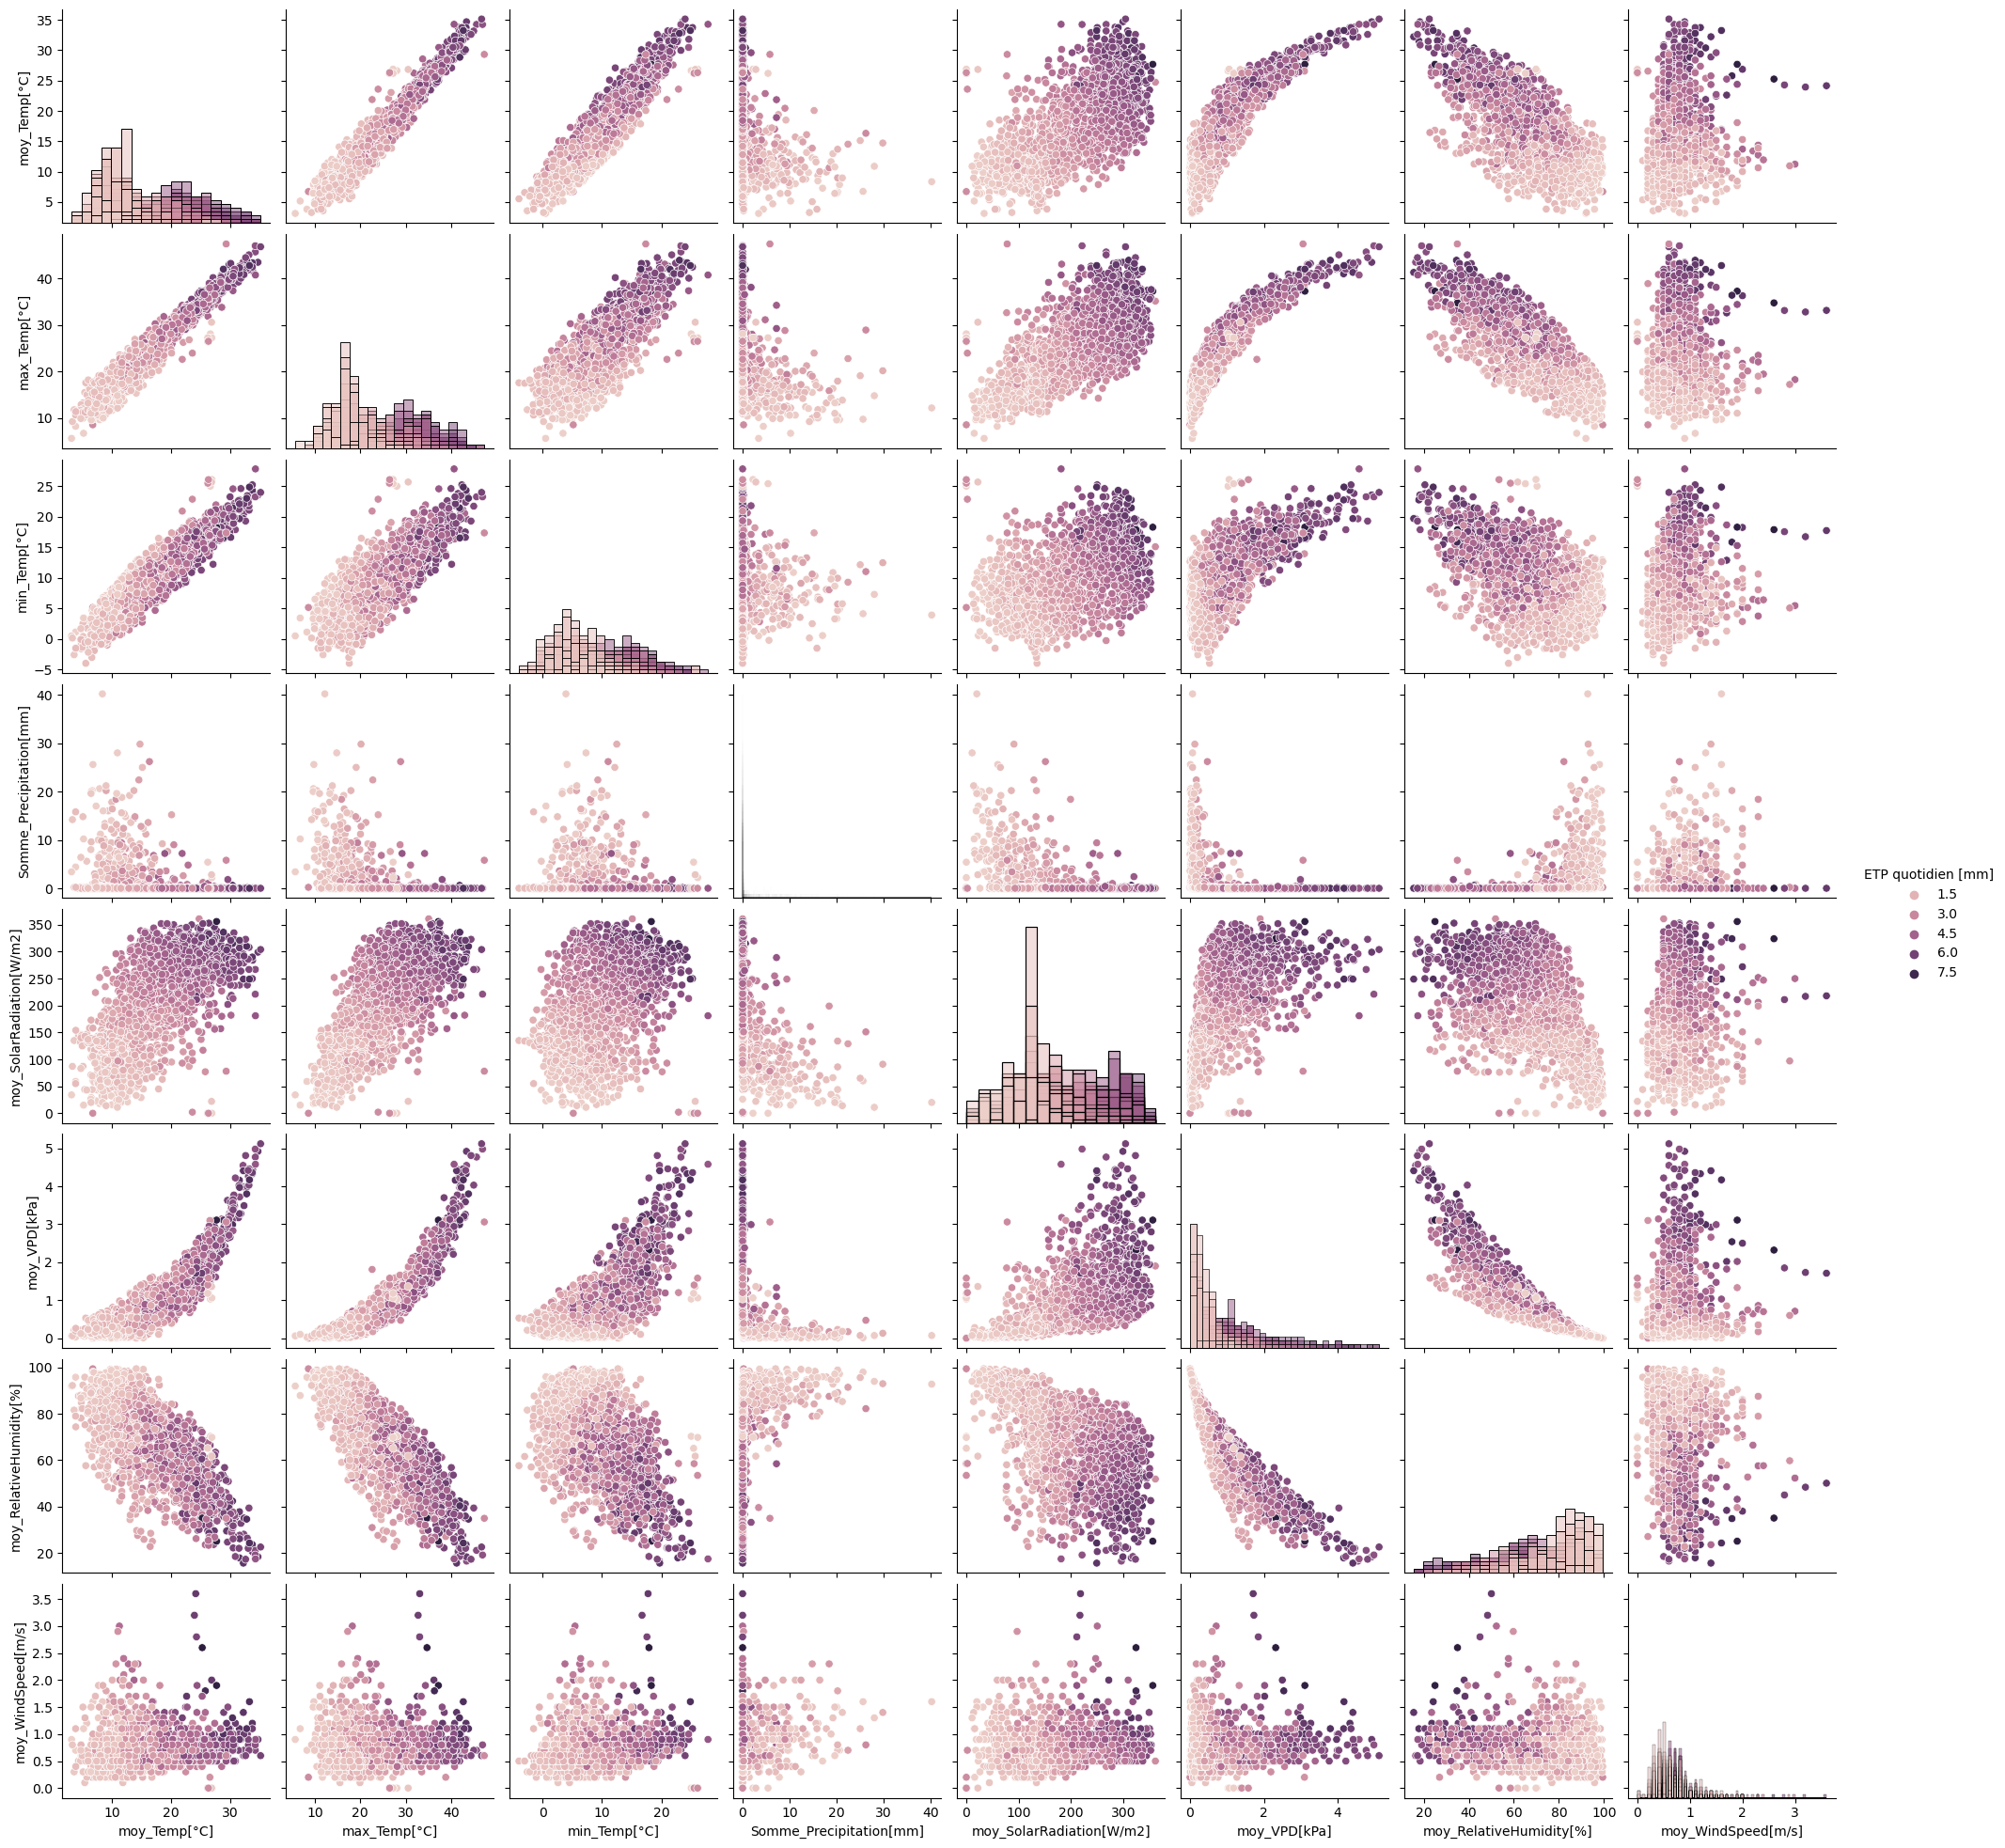

In [8]:
# Create a pair plot of the numeric columns with hue as 'ETP quotidien [mm]'
sns.pairplot(weather_data, vars=['moy_Temp[°C]', 'max_Temp[°C]', 'min_Temp[°C]', 'Somme_Precipitation[mm]', 'moy_SolarRadiation[W/m2]', 'moy_VPD[kPa]', 'moy_RelativeHumidity[%]', 'moy_WindSpeed[m/s]'], hue='ETP quotidien [mm]', diag_kind='hist')
plt.show()

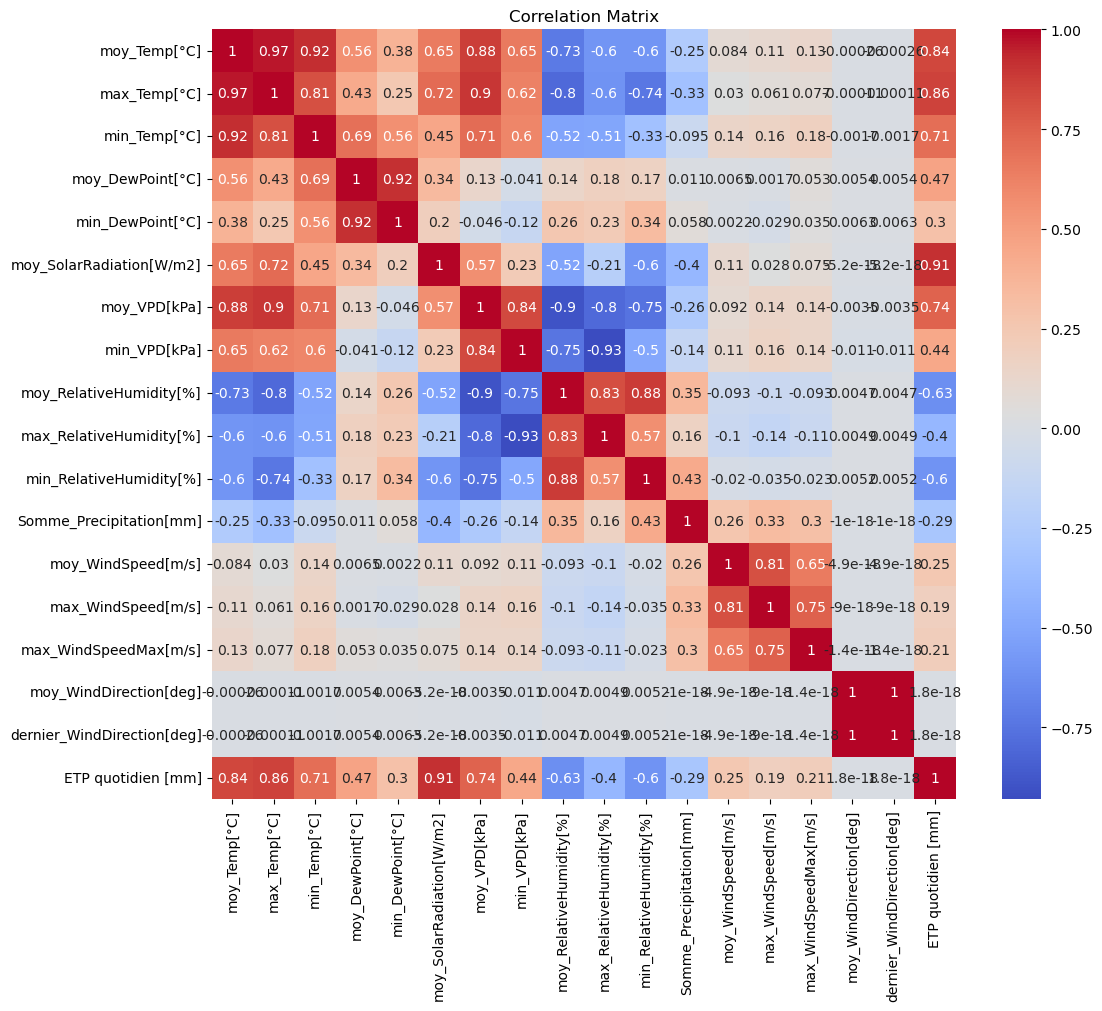

In [9]:
# Plot a correlation heatmap of the numeric columns
corr = weather_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

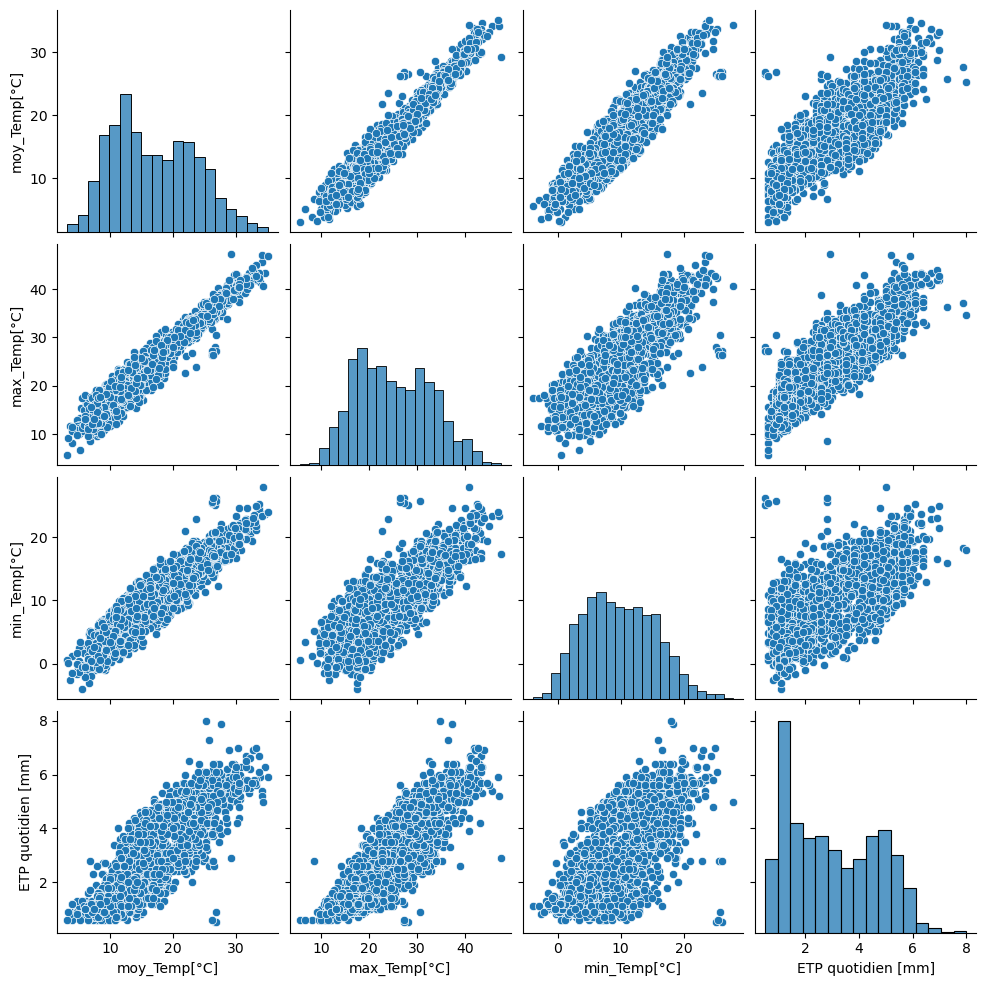

In [10]:
# Create a pair plot of the numeric columns
sns.pairplot(weather_data[['moy_Temp[°C]', 'max_Temp[°C]', 'min_Temp[°C]', 'ETP quotidien [mm]']])
plt.show()

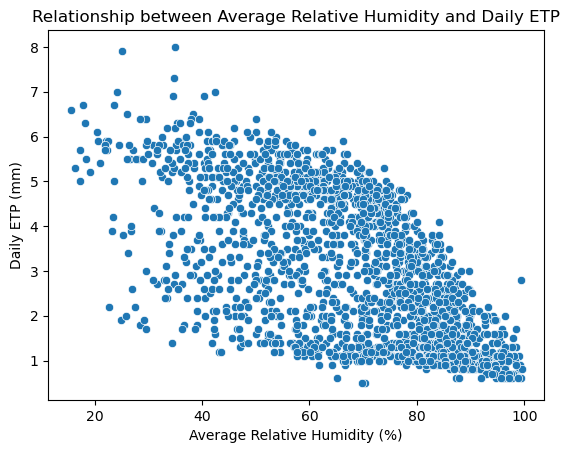

In [11]:
# Create a scatter plot of 'moy_RelativeHumidity[%]' vs 'ETP quotidien [mm]'
sns.scatterplot(x='moy_RelativeHumidity[%]', y='ETP quotidien [mm]', data=weather_data)
plt.xlabel('Average Relative Humidity (%)')
plt.ylabel('Daily ETP (mm)')
plt.title('Relationship between Average Relative Humidity and Daily ETP')
plt.show()

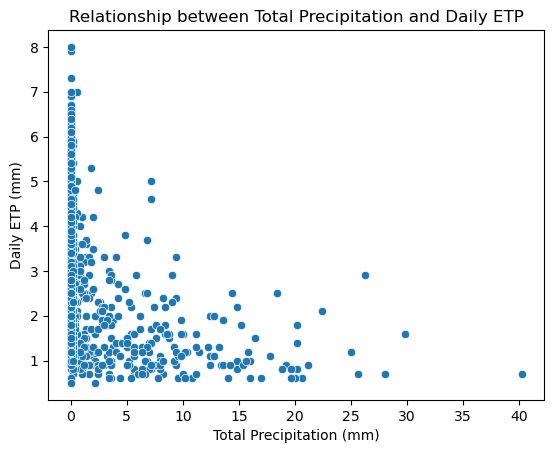

In [12]:
# Create a scatter plot of 'Somme_Precipitation[mm]' vs 'ETP quotidien [mm]'
sns.scatterplot(x='Somme_Precipitation[mm]', y='ETP quotidien [mm]', data=weather_data)
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Daily ETP (mm)')
plt.title('Relationship between Total Precipitation and Daily ETP')
plt.show()

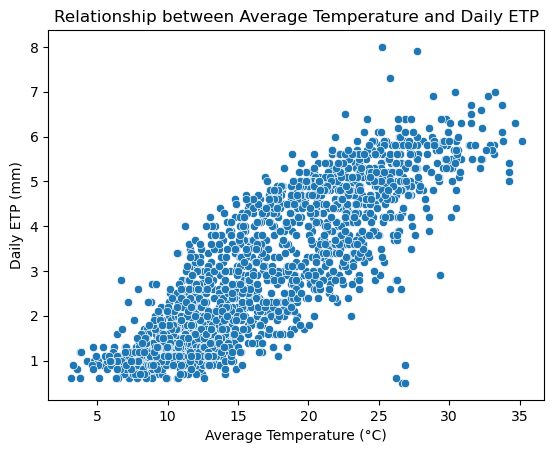

In [13]:
# Create a scatter plot of 'moy_Temp[°C]' vs 'ETP quotidien [mm]'
sns.scatterplot(x='moy_Temp[°C]', y='ETP quotidien [mm]', data=weather_data)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Daily ETP (mm)')
plt.title('Relationship between Average Temperature and Daily ETP')
plt.show()

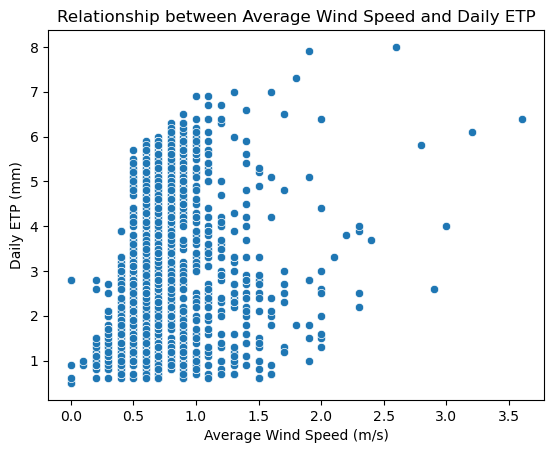

In [14]:
# Create a scatter plot of 'moy_WindSpeed[m/s]' vs 'ETP quotidien [mm]'
sns.scatterplot(x='moy_WindSpeed[m/s]', y='ETP quotidien [mm]', data=weather_data)
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Daily ETP (mm)')
plt.title('Relationship between Average Wind Speed and Daily ETP')
plt.show()

In [15]:
# Extract the features with the highest absolute correlation with 'ETP quotidien [mm]'
corr_threshold = 0.3
selected_features = corr.index[np.abs(corr['ETP quotidien [mm]']) >= corr_threshold]

In [16]:
# Print the selected features
print(selected_features)

Index(['moy_Temp[°C]', 'max_Temp[°C]', 'min_Temp[°C]', 'moy_DewPoint[°C]',
       'moy_SolarRadiation[W/m2]', 'moy_VPD[kPa]', 'min_VPD[kPa]',
       'moy_RelativeHumidity[%]', 'max_RelativeHumidity[%]',
       'min_RelativeHumidity[%]', 'ETP quotidien [mm]'],
      dtype='object')


In [17]:
# Create a new dataset with selected features
new_weather_data = weather_data[selected_features]

In [18]:
new_weather_data.head()

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%],ETP quotidien [mm]
0,24.73,35.08,15.11,12.4,361,1.90,0.30,51.87,83.30,22.00,2.8
1,25.26,35.79,16.40,14.6,288,1.73,0.00,59.06,99.54,19.84,5.0
2,28.37,36.71,19.80,12.3,285,2.56,0.95,38.43,65.76,23.60,5.3
3,32.17,43.43,19.68,0.9,296,4.55,1.70,16.44,38.56,5.23,5.3
4,32.30,41.90,21.26,8.7,290,3.97,1.39,26.68,47.56,9.52,5.5


In [19]:
def add_bias_term(X):
    m = X.shape[0]
    bias = np.ones((m, 1))
    X_with_bias = np.hstack((bias, X))
    return X_with_bias

**Vectorized Notation:**

To perform linear regression through vectorization, we need to express the equation in a vectorized form. The equation can be written as:

**y = X * β**

where:

y is a vector of size m x 1, containing the output values (m is the number of samples)
X is a matrix of size m x (n+1), containing the input features with an additional column of ones for the bias term (n is the number of features)
β is a vector of size (n+1) x 1, containing the coefficients
Vectorized Technique:

The vectorized technique for linear regression involves solving the normal equation, which is an analytical solution to finding the optimal values for β. The normal equation is given by:

**β = (Xᵀ * X)⁻¹ * Xᵀ * y**


In [20]:
def compute_normal_equation(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

**Scaler Method (Gradient Descent):**

The scaler method, also known as gradient descent, is an iterative optimization algorithm that finds the optimal values for β by minimizing the cost function. The algorithm updates the coefficients by taking steps proportional to the negative of the gradient of the cost function:

**β := β - α * ∇J(β)**

where α is the learning rate, which determines the step size, and ∇J(β) is the gradient of the cost function.


In [21]:
def gradient_descent(X, y, alpha=0.000001, iterations=10000):
    # Standardize the input data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    m, n = X.shape
    beta = np.zeros((n, 1))
    
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    
    if y.ndim == 1:
        y = y.reshape(-1, 1) # Reshape y to a column vector (m x 1)
    
    for _ in range(iterations):
        # Calculate the predicted values
        y_pred = X @ beta
        
        # Calculate the error
        error = y_pred - y
        
        # Calculate the gradient of the cost function
        gradient = (2/m) * X.T @ error
        
        # Update beta using the gradient and learning rate
        beta = beta - alpha * gradient
    return beta


In [22]:
def predict(X, beta):
    return X @ beta

In [23]:
X = new_weather_data
X = X.drop('ETP quotidien [mm]', axis=1)
X.head()

,moy_Temp[°C],max_Temp[°C],min_Temp[°C],moy_DewPoint[°C],moy_SolarRadiation[W/m2],moy_VPD[kPa],min_VPD[kPa],moy_RelativeHumidity[%],max_RelativeHumidity[%],min_RelativeHumidity[%]
0,24.73,35.08,15.11,12.4,361,1.90,0.30,51.87,83.30,22.00
1,25.26,35.79,16.40,14.6,288,1.73,0.00,59.06,99.54,19.84
2,28.37,36.71,19.80,12.3,285,2.56,0.95,38.43,65.76,23.60
3,32.17,43.43,19.68,0.9,296,4.55,1.70,16.44,38.56,5.23
4,32.30,41.90,21.26,8.7,290,3.97,1.39,26.68,47.56,9.52


In [24]:
y = new_weather_data['ETP quotidien [mm]']
y.head()

0    2.8
1    5.0
2    5.3
3    5.3
4    5.5
Name: ETP quotidien [mm], dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape) 
print(y_train.shape) 

(1424, 10)
(1424,)


In [27]:
# Add bias term to input features
X_train_with_bias = add_bias_term(X_train)

In [28]:
# Add bias term to input features
X_test_with_bias = add_bias_term(X_test)

In [29]:
print(X_train_with_bias.shape) 
print(y_train.shape) 

(1424, 11)
(1424,)


In [30]:
# Time analysis for vectorized method
start_time = time.time()
beta_vectorized = compute_normal_equation(X_train_with_bias, y_train)
vectorized_time = time.time() - start_time

In [31]:
# Time analysis for scaler method (gradient descent)
start_time = time.time()
beta_gradient_descent = gradient_descent(X_train_with_bias, y_train)
scaler_time = time.time() - start_time

In [32]:
# Make predictions
y_pred_vectorized = predict(X_test_with_bias, beta_vectorized)
y_pred_gradient_descent = predict(X_test_with_bias, beta_gradient_descent)

In [33]:
# Compare execution time
print(f"Execution time for vectorized method: {vectorized_time:.4f} seconds")
print(f"Execution time for scaler method (gradient descent): {scaler_time:.4f} seconds")

Execution time for vectorized method: 0.0077 seconds
Execution time for scaler method (gradient descent): 0.8506 seconds


In [34]:
mae_vectorized = mean_absolute_error(y_test, y_pred_vectorized)
print("Mean Absolute Error:", mae_vectorized)

# Calculate mean squared error
mse_vectorized = mean_squared_error(y_test, y_pred_vectorized)
print("Mean Squared Error:", mse_vectorized)

# Calculate root mean squared error
rmse_vectorized = np.sqrt(mse_vectorized)
print("Root Mean Squared Error:", rmse_vectorized)

# Calculate R-squared
r2_vectorized = r2_score(y_test, y_pred_vectorized)
print("R-squared:", r2_vectorized)

Mean Absolute Error: 0.24266217156074274
Mean Squared Error: 0.11817004438366521
Root Mean Squared Error: 0.3437587008115798
R-squared: 0.9579796453238377


In [35]:
mae_gradient_descent = mean_absolute_error(y_test, y_pred_gradient_descent)
print("Mean Absolute Error:", mae_gradient_descent)

# Calculate mean squared error
mse_gradient_descent = mean_squared_error(y_test, y_pred_gradient_descent)
print("Mean Squared Error:", mse_gradient_descent)

# Calculate root mean squared error
rmse_gradient_descent = np.sqrt(mse_gradient_descent)
print("Root Mean Squared Error:", rmse_gradient_descent)

# Calculate R-squared
r2_gradient_descent = r2_score(y_test, y_pred_gradient_descent)
print("R-squared:", r2_gradient_descent)

Mean Absolute Error: 1.7182297081645592
Mean Squared Error: 4.116587252211719
Root Mean Squared Error: 2.0289374687781088
R-squared: -0.4638266177821284


In [36]:
metrics = {
    'Model': ['Vectorized', 'Gradient Descent'],
    'Time Taken' : [vectorized_time,scaler_time],
    'Mean Absolute Error': [mae_vectorized, mae_gradient_descent],
    'Mean Squared Error': [mse_vectorized, mse_gradient_descent],
    'Root Mean Squared Error': [rmse_vectorized, rmse_gradient_descent],
    'R-squared': [r2_vectorized, r2_gradient_descent]
}

# Create a pandas dataframe using the metrics dictionary
df = pd.DataFrame(metrics)

# Display the dataframe
df

,Model,Time Taken,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Vectorized,0.007717,0.242662,0.118170,0.343759,0.957980
1,Gradient Descent,0.850624,1.718230,4.116587,2.028937,-0.463827
